In [1]:
#Sourced from: 
#https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
%matplotlib inline
 
from skimage.color import rgb2gray    

import matplotlib.pyplot as plt
import numpy as np
import os

from pathlib import Path
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})symbol images in grayscale'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    im = rgb2gray(im)
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)
        

In [3]:
#current directory
cwd = Path.cwd()
#Get relative path
data_path = Path(cwd).parents[0] / 'Program Working Copy' / 'MLResources' / 'Images'
#data_path = 'C:\Users\User\Documents\GitHub\Melody-Scriber\Program Working Copy\MLResources\Images'
os.listdir(data_path)

['12-8-Time',
 '2-2-Time',
 '2-4-Time',
 '3-4-Time',
 '3-8-Time',
 '4-4-Time',
 '6-8-Time',
 '9-8-Time',
 'Barline',
 'C-Clef',
 'Common-Time',
 'Cut-Time',
 'Dot',
 'Double-Flat',
 'Double-Sharp',
 'Eighth-Grace-Note',
 'Eighth-Note',
 'Eighth-Rest',
 'F-Clef',
 'Flat',
 'G-Clef',
 'Half-Note',
 'Multiple-Half-Notes',
 'Natural',
 'Onehundred-Twenty-Eight-Note',
 'Quarter-Note',
 'Quarter-Rest',
 'Sharp',
 'Sixteenth-Note',
 'Sixteenth-Rest',
 'Sixty-Four-Note',
 'Sixty-Four-Rest',
 'Thirty-Two-Note',
 'Thirty-Two-Rest',
 'Whole-Half-Rest',
 'Whole-Note']

In [4]:
base_name = 'Notes'
width = 80
 
include = { 'Half-Note', 'Quarter-Note','Eighth-Note','Sixteenth-Note'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

Eighth-Note
Half-Note


C:\Users\User\AppData\Local\Temp/ipykernel_12124/3999204238.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  im = rgb2gray(im)


Quarter-Note
Sixteenth-Note


C:\Users\User\AppData\Local\Temp/ipykernel_12124/3999204238.py:44: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im = rgb2gray(im)


In [5]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  148
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)symbol images in grayscale
image shape:  (80, 80)
labels: ['Eighth-' 'Half-' 'Quarter-' 'Sixteenth-']


Counter({'Eighth-': 63, 'Half-': 16, 'Quarter-': 52, 'Sixteenth-': 17})

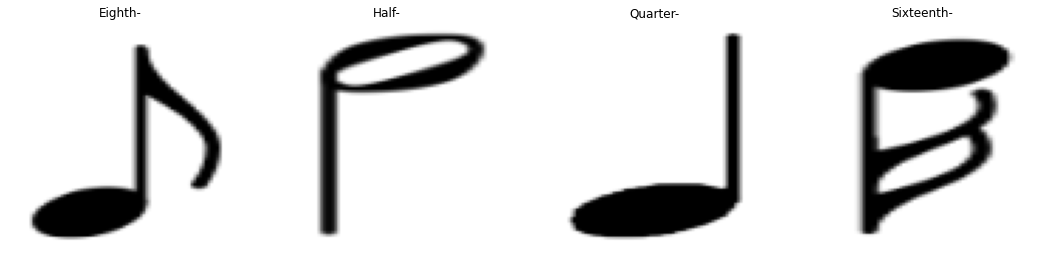

In [6]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    ax.imshow(data['data'][idx],cmap='gray')
    ax.axis('off')
    ax.set_title(label)

In [7]:
X = np.array(data['data'])
y = np.array(data['label'])

In [8]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=41,
    stratify=y
)

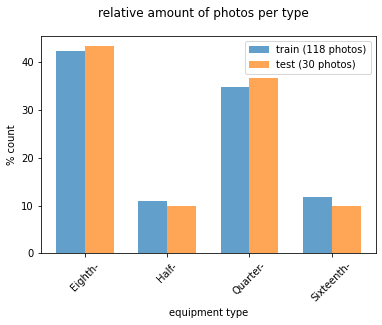

In [9]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [14]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
# 
#dog = imread(r"C:\Users\User\Downloads\musicNote.png", as_gray=True)
## https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
# 
## scale down the image to one third
#dog = rescale(dog, 1, mode='reflect')
## calculate the hog and return a visual representation.
#dog_hog, dog_hog_img = hog(
#    dog, pixels_per_cell=(14,14), 
#    cells_per_block=(2, 2), 
#    orientations=9, 
#    visualize=True, 
#    block_norm='L2-Hys')
# 
#fig, ax = plt.subplots(1,2)
#fig.set_size_inches(8,6)
## remove ticks and their labels
#[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
#    for a in ax]
# 
#ax[0].imshow(dog, cmap='gray')
#ax[0].set_title('dog')
#ax[1].imshow(dog_hog_img, cmap='gray')
#ax[1].set_title('hog')
#plt.show()

In [15]:
#print('number of pixels: ', dog.shape[0] * dog.shape[1])
#print('number of hog features: ', dog_hog.shape[0])

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(118, 576)


C:\Users\User\AppData\Local\Temp/ipykernel_12124/3477491088.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


In [18]:
sgd_clf = SGDClassifier(random_state=41, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=41)

In [19]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

C:\Users\User\AppData\Local\Temp/ipykernel_12124/3477491088.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


In [20]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:20])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]

Percentage correct:  90.0


In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix
#Adapted example troubleshooting with confusion matrix WIP
#labels = 

In [22]:
cmx = confusion_matrix(y_test, y_pred)
cmx

array([[12,  0,  0,  1],
       [ 0,  3,  0,  0],
       [ 0,  1, 10,  0],
       [ 1,  0,  0,  2]], dtype=int64)


 ['Eighth-', 'Half-', 'Quarter-', 'Sixteenth-']


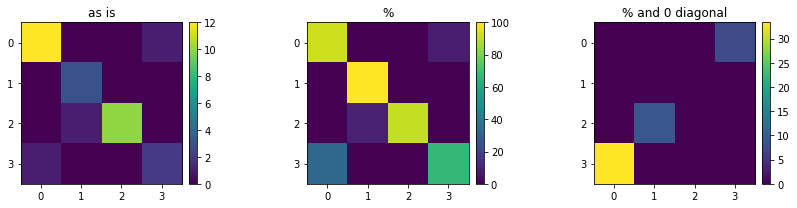

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

In [24]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))


Percentage correct:  90.0


C:\Users\User\AppData\Local\Temp/ipykernel_12124/3477491088.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])
C:\Users\User\AppData\Local\Temp/ipykernel_12124/3477491088.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


In [35]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8)],
         'classify': [
             SGDClassifier(random_state=41, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [36]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\User\AppData\Local\Temp/ipykernel_12124/3477491088.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


In [37]:
# save the model to disk
joblib.dump(grid_res, 'hog_sgd_model.pkl');

In [38]:
# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify',
                 HogTransformer(cells_per_block=(2, 2),
                                pixels_per_cell=(12, 12))),
                ('scalify', StandardScaler()),
                ('classify', SGDClassifier(random_state=42))])

In [39]:
# the highscore during the search
grid_res.best_score_

0.7549145299145299

In [40]:
pp.pprint(grid_res.best_params_)

{   'hogify__cells_per_block': (2, 2),
    'hogify__orientations': 9,
    'hogify__pixels_per_cell': (12, 12)}


In [41]:
best_pred = grid_res.predict(X_test)
print('Percentage correct: ', 100*np.sum(best_pred == y_test)/len(y_test))

Percentage correct:  93.33333333333333


C:\Users\User\AppData\Local\Temp/ipykernel_12124/3477491088.py:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


In [42]:
cmx_svm = confusion_matrix(y_test, best_pred)

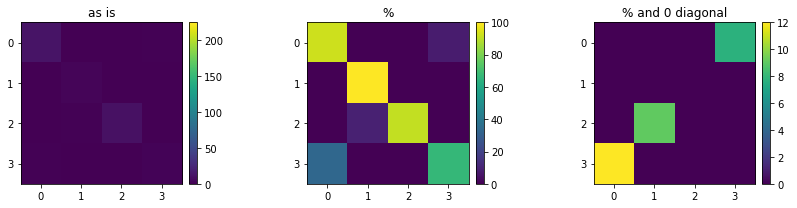

In [43]:
plot_confusion_matrix(cmx, vmax1=225, vmax2=100, vmax3=12)

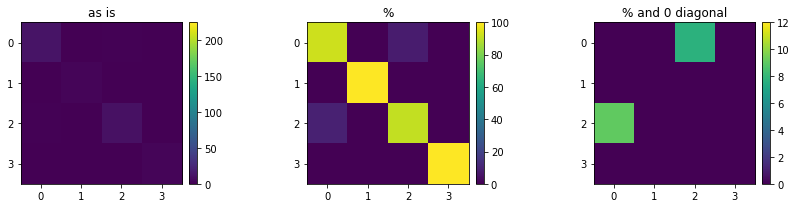

In [34]:
plot_confusion_matrix(cmx_svm, vmax1=225, vmax2=100, vmax3=12)